In [2]:
# import the libaries
from ema_workbench import load_results
from ema_workbench.analysis import parcoords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from ema_workbench.analysis import prim
import numpy as np
from ema_workbench.util import ema_logging
from ema_workbench.analysis import pairs_plotting, prim

In [3]:
input_filename = 'results/base_case'
results = load_results(input_filename + '.tar.gz')

In [4]:
experiments, outcomes = results
print('shape =', experiments.shape)
display(experiments.head())

shape = (1000, 53)


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,47,41.703939,1.0,0.399537,140.002953,1.0,0.398421,211.527012,1.0,0.876900,...,0,0,0,0,0,0,0,1000,base case no policy,dikesnet
1,26,189.562974,10.0,0.200377,198.830697,10.0,0.860282,275.047560,1.0,0.570607,...,0,0,0,0,0,0,0,1001,base case no policy,dikesnet
2,62,313.552203,10.0,0.289945,107.939695,1.0,0.169323,248.005169,1.5,0.041244,...,0,0,0,0,0,0,0,1002,base case no policy,dikesnet
3,97,238.522558,1.5,0.599571,232.803485,10.0,0.279914,337.598973,1.5,0.219554,...,0,0,0,0,0,0,0,1003,base case no policy,dikesnet
4,132,193.629512,10.0,0.014388,56.941584,1.5,0.022782,299.657122,1.0,0.792309,...,0,0,0,0,0,0,0,1004,base case no policy,dikesnet


In [5]:
# load the basecase results

df_base = pd.read_csv("results/base_case_results.csv")
df_base.drop(columns=["Unnamed: 0"],inplace=True)
df_base.head()

,A.1 External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2 External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,0.934661,1.171893e+09,0,0.076309,6.917995e+07,47,41.703939,1.0,0.399537,...,0,0,0,0,0,0,0,1000,base case no policy,dikesnet
1,0,1.745679,3.097170e+09,0,0.000000,0.000000e+00,26,189.562974,10.0,0.200377,...,0,0,0,0,0,0,0,1001,base case no policy,dikesnet
2,0,1.769683,2.536524e+09,0,0.007914,8.709429e+06,62,313.552203,10.0,0.289945,...,0,0,0,0,0,0,0,1002,base case no policy,dikesnet
3,0,0.078852,1.283773e+08,0,0.197261,2.509813e+08,97,238.522558,1.5,0.599571,...,0,0,0,0,0,0,0,1003,base case no policy,dikesnet
4,0,1.754946,2.433748e+09,0,0.316296,3.578536e+08,132,193.629512,10.0,0.014388,...,0,0,0,0,0,0,0,1004,base case no policy,dikesnet


In [6]:
df_base.columns

Index(['A.1 External Costs', 'A.1_Expected Number of Deaths',
       'A.1_Expected Annual Damage', 'A.2 External Costs',
       'A.2_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A

In [7]:
# Our objectives are the following: External Costs, Expected Number of Deaths, Expected Annual Damage
# Per location, so times 2. 
df_outcomes = pd.DataFrame(outcomes)
df_outcomes

,A.1 External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2 External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.934661,1.171893e+09,0,0.076309,6.917995e+07
1,0,1.745679,3.097170e+09,0,0.000000,0.000000e+00
2,0,1.769683,2.536524e+09,0,0.007914,8.709429e+06
3,0,0.078852,1.283773e+08,0,0.197261,2.509813e+08
4,0,1.754946,2.433748e+09,0,0.316296,3.578536e+08
...,...,...,...,...,...,...
995,0,0.936848,1.247677e+09,0,0.397076,4.092125e+08
996,0,0.014574,1.821613e+07,0,0.046157,4.365977e+07
997,0,1.750752,2.832421e+09,0,0.000000,0.000000e+00
998,0,0.109277,1.460642e+08,0,0.019242,1.906335e+07


In [8]:
df_outcomes

,A.1 External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2 External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.934661,1.171893e+09,0,0.076309,6.917995e+07
1,0,1.745679,3.097170e+09,0,0.000000,0.000000e+00
2,0,1.769683,2.536524e+09,0,0.007914,8.709429e+06
3,0,0.078852,1.283773e+08,0,0.197261,2.509813e+08
4,0,1.754946,2.433748e+09,0,0.316296,3.578536e+08
...,...,...,...,...,...,...
995,0,0.936848,1.247677e+09,0,0.397076,4.092125e+08
996,0,0.014574,1.821613e+07,0,0.046157,4.365977e+07
997,0,1.750752,2.832421e+09,0,0.000000,0.000000e+00
998,0,0.109277,1.460642e+08,0,0.019242,1.906335e+07


[[Text(0, 0, '')]]

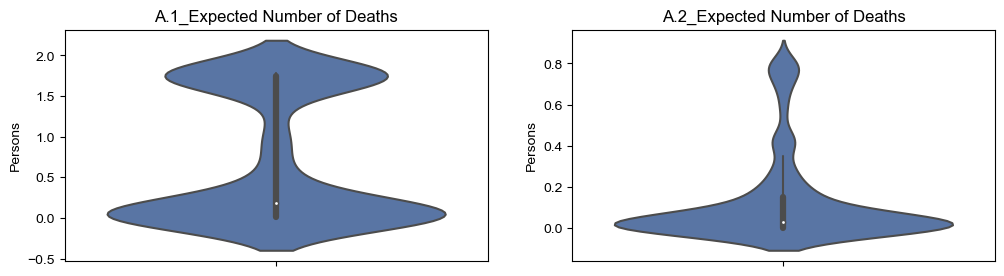

In [9]:
# #First we are going to look at the totals

# plotting the number of deaths and the damage costs (aggregated over time and location)
f, axes = plt.subplots(1, 2, figsize=(12,3))
sns.set(style="whitegrid", font_scale=1)
plt.rcParams["axes.labelsize"] = 15

sns.violinplot(data=df_outcomes["A.1_Expected Number of Deaths"], ax=axes[0])
sns.violinplot(data=df_outcomes["A.2_Expected Number of Deaths"], ax=axes[1])

#layout of the plots
axes[0].set_title("A.1_Expected Number of Deaths")
axes[0].set_ylabel('Persons')
axes[0].set(xticklabels = [])

axes[1].set_title("A.2_Expected Number of Deaths")
axes[1].set_ylabel('Persons')
axes[1].set(xticklabels = [])

In [10]:
outcomes_of_interest = list(df_outcomes.columns)
outcomes_of_interest_A1 = [i for i in outcomes_of_interest if 'A.1' in i]
outcomes_of_interest_A2 = [i for i in outcomes_of_interest if 'A.2' in i]

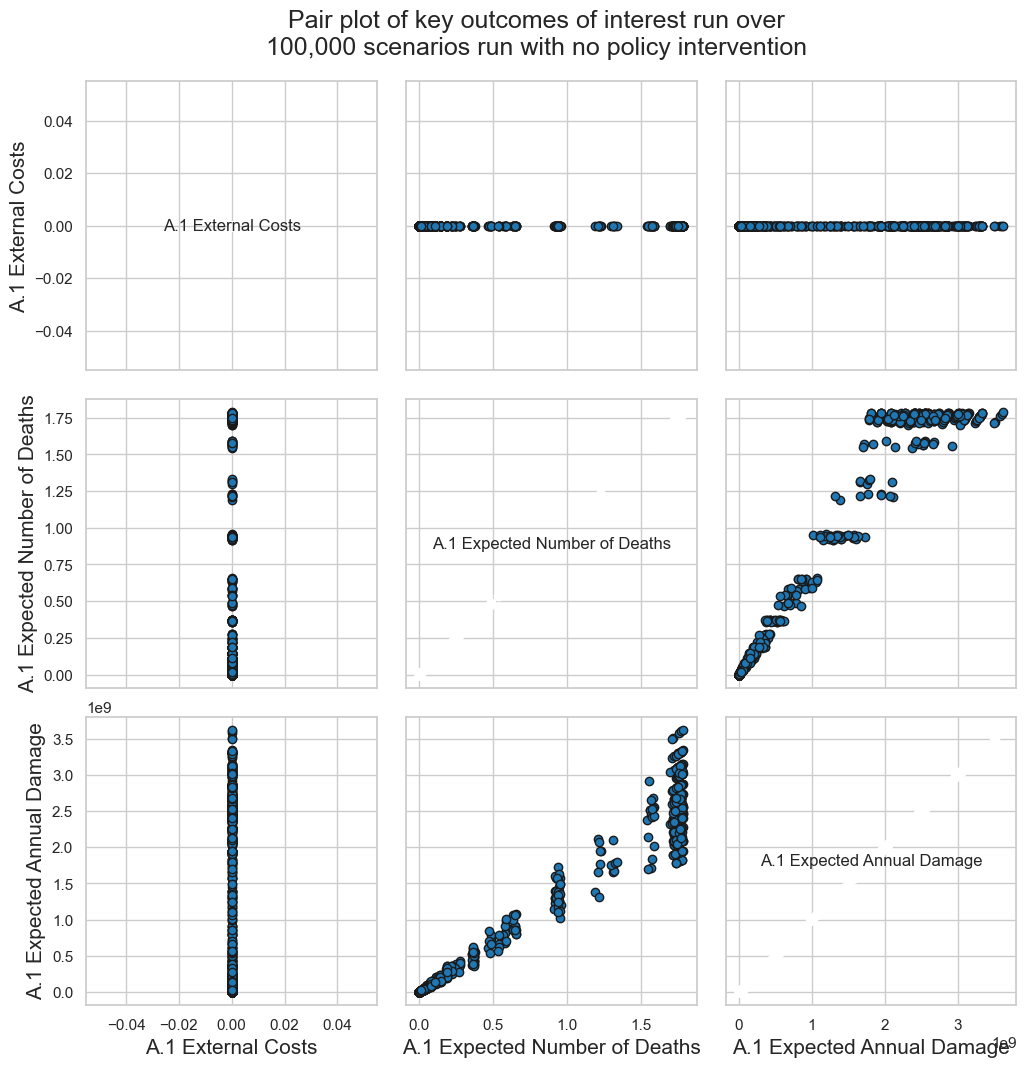

In [11]:
# Subset & rename data columns for readability
outcomes_subset = {k:outcomes[k] for k in outcomes_of_interest_A1 if k in outcomes}

ylabels = {
    'A.1 External Costs' : 'A.1 External Costs',
    'A.1_Expected Number of Deaths' : 'A.1 Expected Number of Deaths',
    'A.1_Expected Annual Damage' : 'A.1 Expected Annual Damage',
    # 'A.2 External Costs' : 'A.2 External Costs',
    # 'A.2_Expected Number of Deaths' : 'A.2 Expected Number of Deaths',
    # 'A.2_Expected Annual Damage' : 'A.2 Expected Annual Damage'
        }

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset,
                                         legend=True, ylabels=ylabels,
                                         linewidth=0,
                                        )

# Graph settings
fig.set_size_inches(12, 12)
fig.suptitle("Pair plot of key outcomes of interest run over\n"
             + "100,000 scenarios run with no policy intervention",
             fontsize=18, y=0.94)
# plt.savefig('img/scenario_discovery__outcomes_pairplot.png')
plt.show()

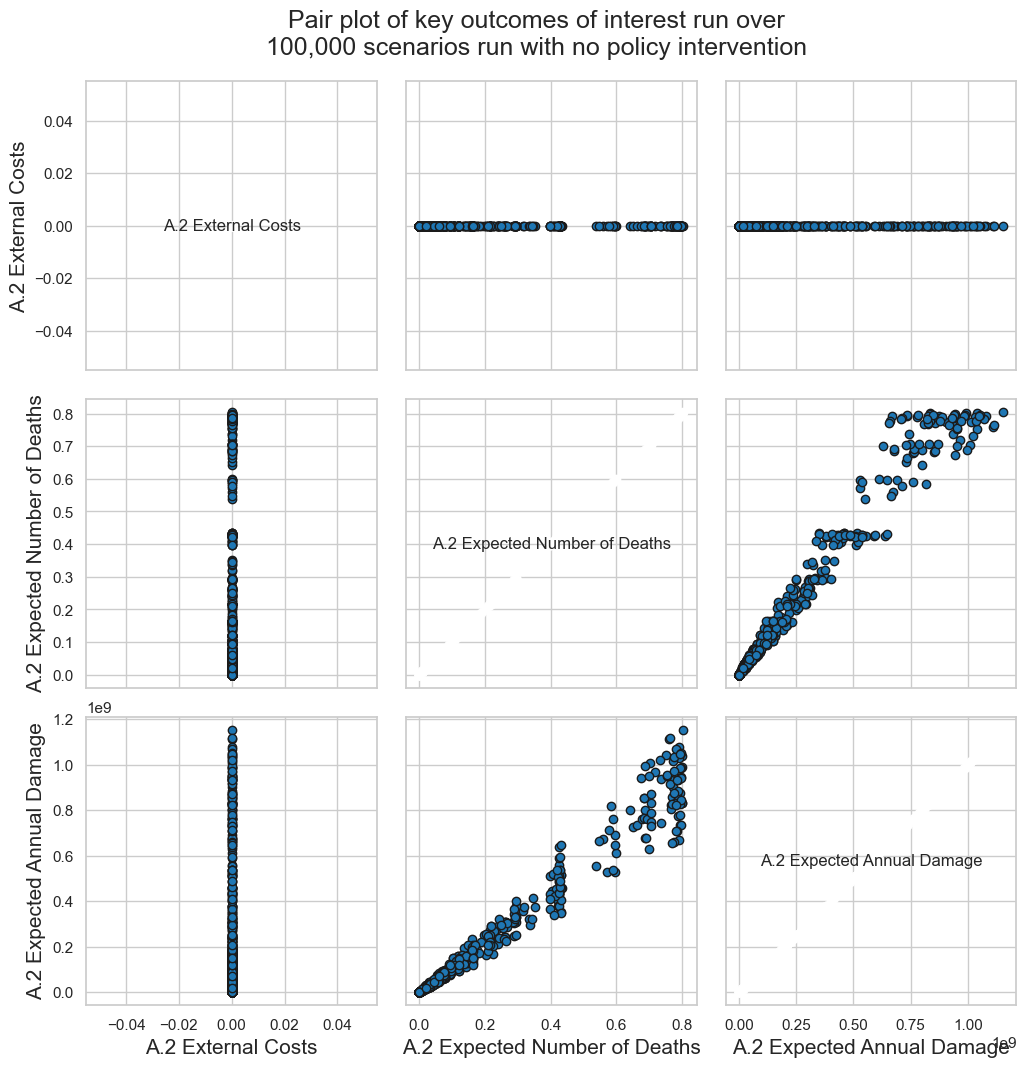

In [12]:
# Subset & rename data columns for readability
outcomes_subset = {k:outcomes[k] for k in outcomes_of_interest_A2 if k in outcomes}

ylabels = {
    # 'A.1 External Costs' : 'A.1 External Costs',
    # 'A.1_Expected Number of Deaths' : 'A.1 Expected Number of Deaths',
    # 'A.1_Expected Annual Damage' : 'A.1 Expected Annual Damage',
    'A.2 External Costs' : 'A.2 External Costs',
    'A.2_Expected Number of Deaths' : 'A.2 Expected Number of Deaths',
    'A.2_Expected Annual Damage' : 'A.2 Expected Annual Damage'
        }

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset,
                                         legend=True, ylabels=ylabels,
                                         linewidth=0,
                                        )

# Graph settings
fig.set_size_inches(12, 12)
fig.suptitle("Pair plot of key outcomes of interest run over\n"
             + "100,000 scenarios run with no policy intervention",
             fontsize=18, y=0.94)
# plt.savefig('img/scenario_discovery__outcomes_pairplot.png')
plt.show()

In [13]:
df_outcomes

,A.1 External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2 External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.934661,1.171893e+09,0,0.076309,6.917995e+07
1,0,1.745679,3.097170e+09,0,0.000000,0.000000e+00
2,0,1.769683,2.536524e+09,0,0.007914,8.709429e+06
3,0,0.078852,1.283773e+08,0,0.197261,2.509813e+08
4,0,1.754946,2.433748e+09,0,0.316296,3.578536e+08
...,...,...,...,...,...,...
995,0,0.936848,1.247677e+09,0,0.397076,4.092125e+08
996,0,0.014574,1.821613e+07,0,0.046157,4.365977e+07
997,0,1.750752,2.832421e+09,0,0.000000,0.000000e+00
998,0,0.109277,1.460642e+08,0,0.019242,1.906335e+07


In [14]:
experiments_sliced = experiments.iloc[:,:19]

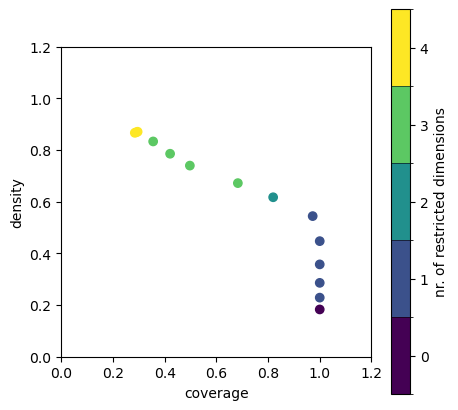

In [28]:
# Setting the upper 25% range for the total number of deaths and  damage costs 

percentile_damage_A1 = np.percentile(df_outcomes["A.1_Expected Annual Damage"], 75)
percentile_deaths_A1 = np.percentile(df_outcomes["A.1_Expected Number of Deaths"], 75)

# Bool the values if they are larger than the threshold
selval = pd.DataFrame()
selval["Cost25p"] = df_outcomes["A.1_Expected Annual Damage"] > percentile_damage_A1
selval["Death25p"] = df_outcomes["A.1_Expected Number of Deaths"] > percentile_deaths_A1

# If cost and deaths are in the 75th upper percentiles indicate true
y1 = selval["Cost25p"] & selval["Death25p"] 
# y1.to_csv('./worst_scenarios_PRIM.csv')

# Execute prim algorithm
# We select the value for peel_alpha by trial and error such that we get all the dimensions as output 
# as well as a threshold above 0.65
prim_alg = prim.Prim(experiments_sliced, y1, threshold=0.8, peel_alpha=0.2)
box1 = prim_alg.find_box()

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (5,5)

# Show trade off plot
box1.show_tradeoff()



#plt.savefig("PRIM_tradeoff_scenarios")
plt.show()

In [29]:
box1.peeling_trajectory

,coverage,density,id,k,mass,mean,n,res_dim
0,1.000000,0.183000,0,183,1.000,0.183000,1000,0
1,1.000000,0.228750,1,183,0.800,0.228750,800,1
2,1.000000,0.285938,2,183,0.640,0.285938,640,1
3,1.000000,0.357422,3,183,0.512,0.357422,512,1
4,1.000000,0.447433,4,183,0.409,0.447433,409,1
5,0.972678,0.544343,5,178,0.327,0.544343,327,1
6,0.819672,0.617284,6,150,0.243,0.617284,243,2
7,0.683060,0.672043,7,125,0.186,0.672043,186,3
8,0.497268,0.739837,8,91,0.123,0.739837,123,3
9,0.420765,0.785714,9,77,0.098,0.785714,98,3


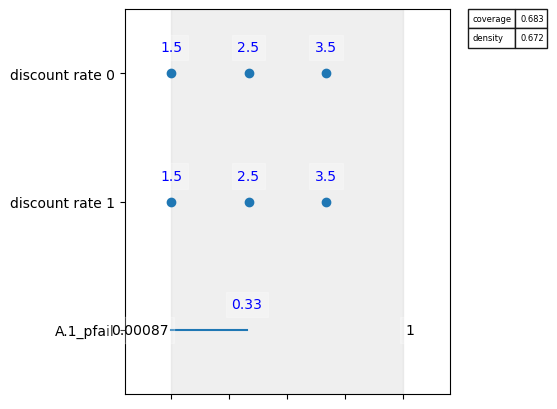

In [30]:
box1.inspect(7, style='graph', ticklabel_formatter='{}', boxlim_formatter='{:.2g}')
# box1.select(10)
#plt.savefig("PRIM_boxinspect_scenarios")
plt.show()

In [33]:
box1.show_pairs_scatter(2)

OptionError: No such keys(s): 'mode.use_inf_as_null'